# **Task 4**
# **Stock Market Prediction using Numerical and Textual Analysis**


# PRUDVIRAJ AARETI

## Load dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob

In [2]:
# pip install TextBlob

In [3]:
data = pd.read_csv('F:\\Data Science\\TSF\\india-news-headlines.csv')
data.head()

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


- As we can see in `headline_category` column there are some cities name, let's separate this cities name

In [4]:
data['headline_category'].value_counts()   

india                      285619
unknown                    207732
city.mumbai                132649
city.delhi                 124658
business.india-business    115246
                            ...  
delhi-ncr                       7
sports.headline3                7
did-you-know                    6
sports.headline6                3
party-manifestos                2
Name: headline_category, Length: 1016, dtype: int64

- only take that data that contain 'city' word and store that data in new dataframe 'city_data'

In [6]:
city_data = data[data['headline_category'].str.contains('^city\.[a-z]+$', regex=True)]

In [8]:
# takes only that headline_category which contain `city word`
city_data.head()

,publish_date,headline_category,headline_text
274,20010104,city.bengaluru,Three in race for chief secy's post
275,20010104,city.patna,Druggists' stir leads to shortage of medicines
278,20010104,city.bengaluru,He's not so inscrutable
279,20010104,city.delhi,DPCC stages Nyay rally
643,20010110,city.patna,Fend for yourselves; Pande tells doctors


- create a new temparory dataframet which have only one column `city_name` 

In [9]:
city_split = pd.DataFrame(columns=['city_name'])

- split city word and name of city which join by '.' we need only cities name and stored it in to 'city_name' column

In [10]:
city_split['city_name'] = city_data.headline_category.str.split('.',expand=True)[1]

In [11]:
# concate the data set city_data and city_split
city_data = pd.concat([city_data,city_split],axis=1)

In [12]:
# removing unnecessary column from dataset
city_data.drop(columns=['headline_category'],axis=1, inplace=True)

In [13]:
# re-setting the index
city_data.reset_index(inplace=True)

In [14]:
# see the final data which contain city_name column
city_data.head()

,index,publish_date,headline_text,city_name
0,274,20010104,Three in race for chief secy's post,bengaluru
1,275,20010104,Druggists' stir leads to shortage of medicines,patna
2,278,20010104,He's not so inscrutable,bengaluru
3,279,20010104,DPCC stages Nyay rally,delhi
4,643,20010110,Fend for yourselves; Pande tells doctors,patna


In [19]:
city_data.dtypes   
# publish data have "int" datatype we have to change that into "datetime"

index             int64
publish_date      int64
headline_text    object
city_name        object
dtype: object

**changing datatype from int to datetime**

In [19]:
city_data['publish_date'] = pd.to_datetime(city_data['publish_date'])
city_data.head()

,index,publish_date,headline_text,city_name
0,274,1970-01-01 00:00:00.020010104,Three in race for chief secy's post,bengaluru
1,275,1970-01-01 00:00:00.020010104,Druggists' stir leads to shortage of medicines,patna
2,278,1970-01-01 00:00:00.020010104,He's not so inscrutable,bengaluru
3,279,1970-01-01 00:00:00.020010104,DPCC stages Nyay rally,delhi
4,643,1970-01-01 00:00:00.020010110,Fend for yourselves; Pande tells doctors,patna


- we are extrating only **years** from `publish_date` column

In [20]:
city_data['Year'] = city_data['publish_date'].apply(lambda x: (x.microsecond)//10)

In [21]:
# dropping unnecessary columns
city_data.drop(columns=['publish_date','index'],axis=1,inplace=True)

- final data with year-wise

In [22]:
# final result
city_data.head()

,headline_text,city_name,Year
0,Three in race for chief secy's post,bengaluru,2001
1,Druggists' stir leads to shortage of medicines,patna,2001
2,He's not so inscrutable,bengaluru,2001
3,DPCC stages Nyay rally,delhi,2001
4,Fend for yourselves; Pande tells doctors,patna,2001


In [23]:
city_data_2 = city_data.copy()
city_data_2['No_headline_text'] = 1

In [24]:
# dropping unwanted column
city_data_2.drop(columns=['headline_text'],axis=1, inplace=True)

In [25]:
city_data_2.head()

,city_name,Year,No_headline_text
0,bengaluru,2001,1
1,patna,2001,1
2,bengaluru,2001,1
3,delhi,2001,1
4,patna,2001,1


### **Let's see which Topic that have high no. of Coverage**

In [38]:
data.head()

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


In [39]:
# for safety always take copy of original data
new_data = data.copy()

- creating a new column `category` that contains **headline categories**

In [40]:
new_data['category']=new_data['headline_category'].str.split('.').map(lambda x : x[0])

In [41]:
new_data.head()

,publish_date,headline_category,headline_text,category
0,20010101,sports.wwe,win over cena satisfying but defeating underta...,sports
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...,unknown
2,20010102,unknown,Fissures in Hurriyat over Pak visit,unknown
3,20010102,unknown,America's unwanted heading for India?,unknown
4,20010102,unknown,For bigwigs; it is destination Goa,unknown


- groupby categories and let's see **which category topic have high no. of headline**

In [42]:
top_categories = new_data.groupby(['category']).agg({'headline_text':'count'}).sort_values(by='headline_text',ascending = False)

- dropping some un-wanted category like **`unknown, tv, top-stories, city, citizen, edit-page etc`**

In [44]:
top_10_cat = top_categories.drop(['unknown', 'tv', 'top-stories', 'city', 'citizen', 'edit-page','top-headlines','world']).head(10)
top_10_cat

,headline_text
category,
india,285619
entertainment,224877
business,153876
sports,129494
home,77208
life-style,43370
tech,37220
news,13987
elections,9003


### **Sentiment Analysis**

In [26]:
def getAnalysis_polarity(headline):
    result = TextBlob(headline)
    
    if result.sentiment.polarity < 0:
        return 'negative'
    elif result.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'positive'

- creating a columns which shows which headline have `nigative`, `positive` or `neutral` headline

In [27]:
data['Result'] = np.array([getAnalysis_polarity(headline) for headline in data['headline_text']])

In [28]:
data.head()

,publish_date,headline_category,headline_text,Result
0,20010101,sports.wwe,win over cena satisfying but defeating underta...,positive
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...,neutral
2,20010102,unknown,Fissures in Hurriyat over Pak visit,neutral
3,20010102,unknown,America's unwanted heading for India?,neutral
4,20010102,unknown,For bigwigs; it is destination Goa,neutral


In [29]:
final_result = data.groupby(['Result']).agg({'headline_text':'count'})

- Let's see how many **negative headlines**, **positive headlines** and **neutral headlines** in dataset

In [30]:
final_result

,headline_text
Result,
negative,398194
neutral,2301599
positive,597379


### **Overall Sentiment Distribution**

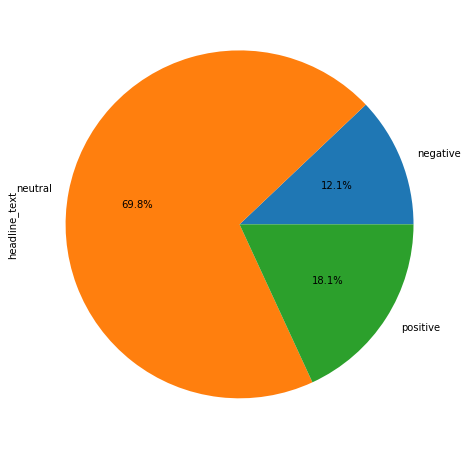

In [31]:
plt.figure(figsize=(8,8))
final_result['headline_text'].plot.pie(autopct='%1.1f%%')
plt.show()

In [32]:
negative = (final_result.loc['negative'] / len(data))*100
neutral = (final_result.loc['neutral'] / len(data))*100
positive = (final_result.loc['positive'] / len(data))*100

In [33]:
print('Positive Headlines: ' , positive )
print('\n\nNegative Headlines: ' ,negative )
print('\n\nUnbiased Headlines: ' , str(neutral))

Positive Headlines:  headline_text    18.11792
Name: positive, dtype: float64


Negative Headlines:  headline_text    12.076834
Name: negative, dtype: float64


Unbiased Headlines:  headline_text    69.805245
Name: neutral, dtype: float64


# **`Task 4.2`** **Stock Price Prediction**

- performance prediction using numerical analysis of historical stock prices,

## Load dataset

In [34]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.seasonal import seasonal_decompose

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [37]:
df = pd.read_csv("F:\\Data Science\\TSF\\History_Stock.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0.0
1,2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0.0
2,2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0.0
3,2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0.0
4,2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0.0


In [38]:
df.shape

(4868, 7)

In [39]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4794.000000,4794.000000,4794.000000,4794.000000,4794.000000,4.794000e+03
mean,18030.688513,18140.101681,17886.514843,18010.386467,18010.386467,8.190457e+04
std,10821.709847,10858.252161,10756.303530,10803.045091,10803.045091,1.080929e+06
min,2621.889893,2682.590088,2594.870117,2600.120117,2600.120117,0.000000e+00
25%,8391.965088,8484.599854,8268.722168,8377.915283,8377.915283,9.200000e+03
50%,17438.375001,17530.584961,17291.575195,17424.110352,17424.110352,1.380000e+04
75%,26658.995606,26765.137696,26467.449707,26631.094239,26631.094239,2.080000e+04
max,42263.000000,42273.871094,41850.289063,41952.628906,41952.628906,3.181510e+07


### plot **close price**

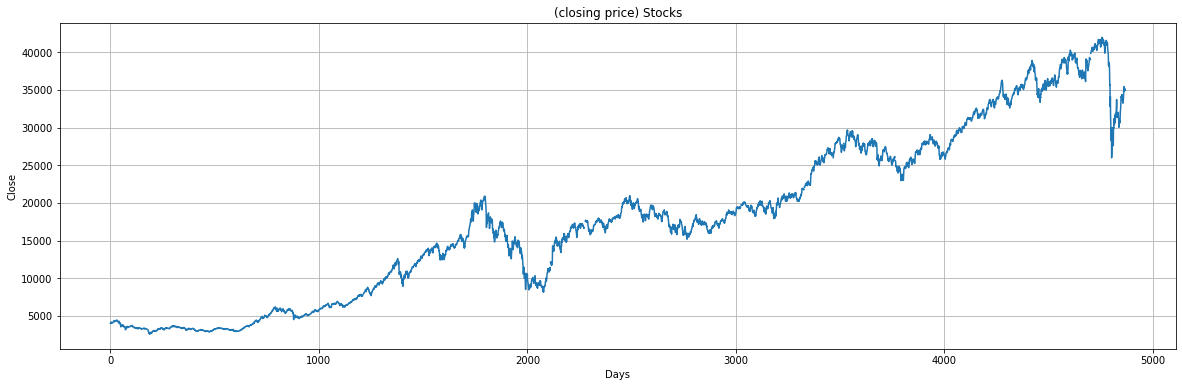

In [40]:

plt.figure(figsize=(20,6))
plt.grid(True)
plt.plot(df['Close'])
plt.xlabel('Days')
plt.ylabel('Close')
plt.title('(closing price) Stocks')
plt.show()

### plot **open price**

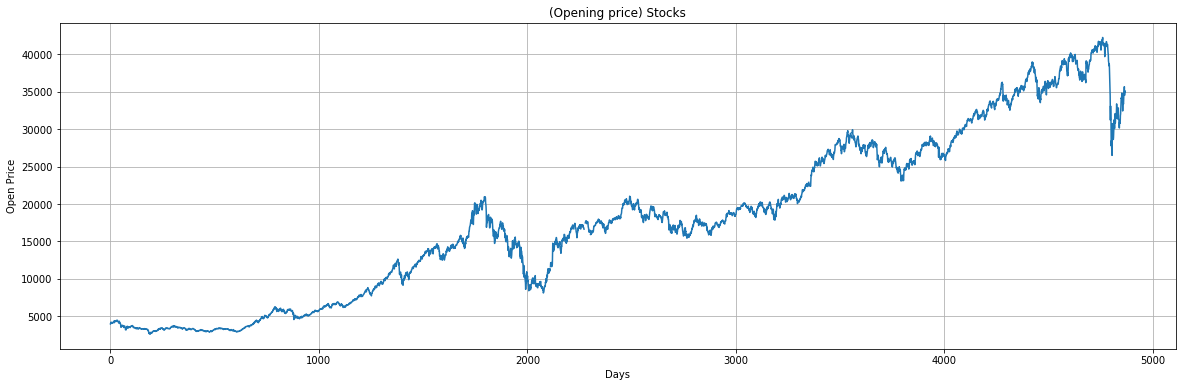

In [41]:
plt.figure(figsize=(20,6))
plt.grid(True)
plt.plot(df['Open'])
plt.xlabel('Days')
plt.ylabel('Open Price')
plt.title('(Opening price) Stocks')
plt.show()

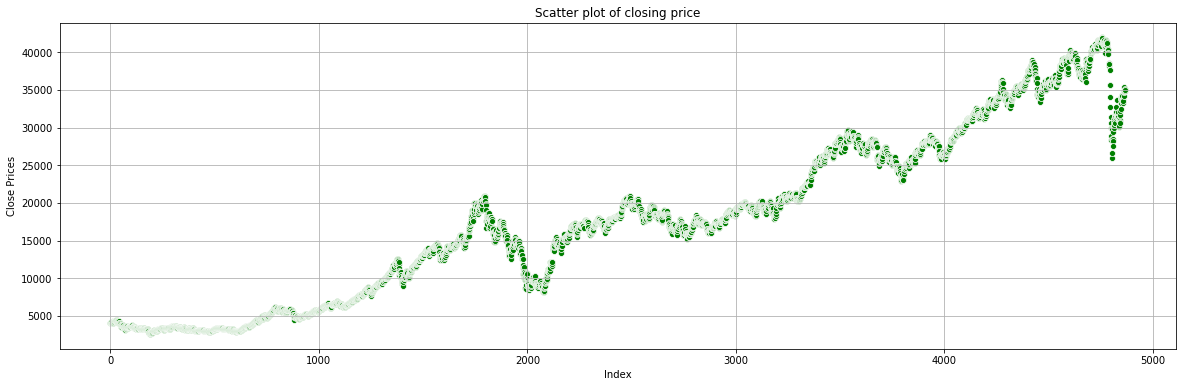

In [43]:
#plot close price using scatterplot

plt.figure(figsize=(20,6))
plt.grid(True)
sns.scatterplot(df.index,df['Close'],color='green')
plt.xlabel('Index')
plt.ylabel('Close Prices')
plt.title('Scatter plot of closing price')
plt.show()


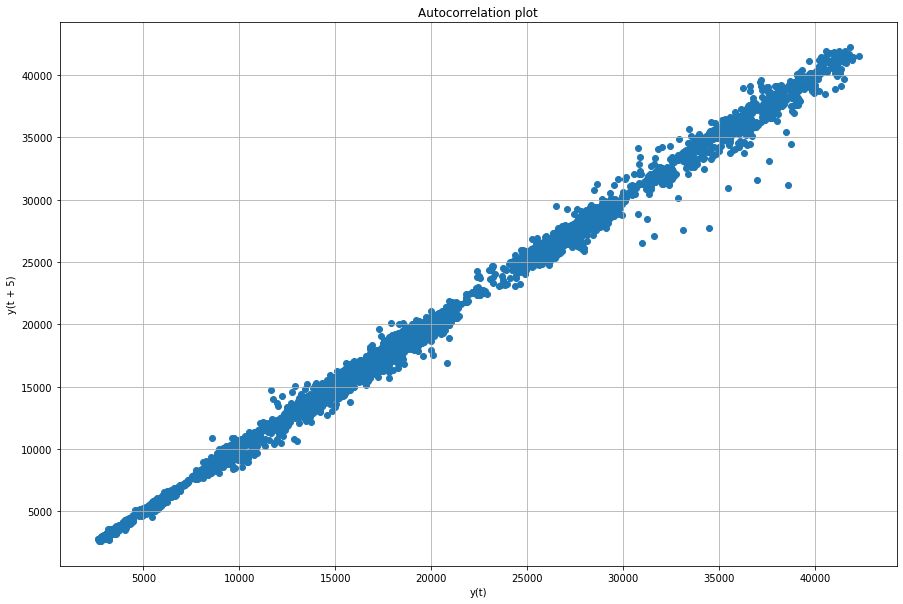

In [45]:
#plot open price

plt.figure(figsize=(15,10))
plt.grid(True)
lag_plot(df['Open'], lag=5)
plt.title('Autocorrelation plot')
plt.show()

In [47]:
df= df.dropna()

In order to perform a time series analysis, we may need to **separate seasonality and trend from our series**. The resultant series will become stationary through this process.

So let us separate Trend and Seasonality from the time series

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


<Figure size 432x288 with 0 Axes>

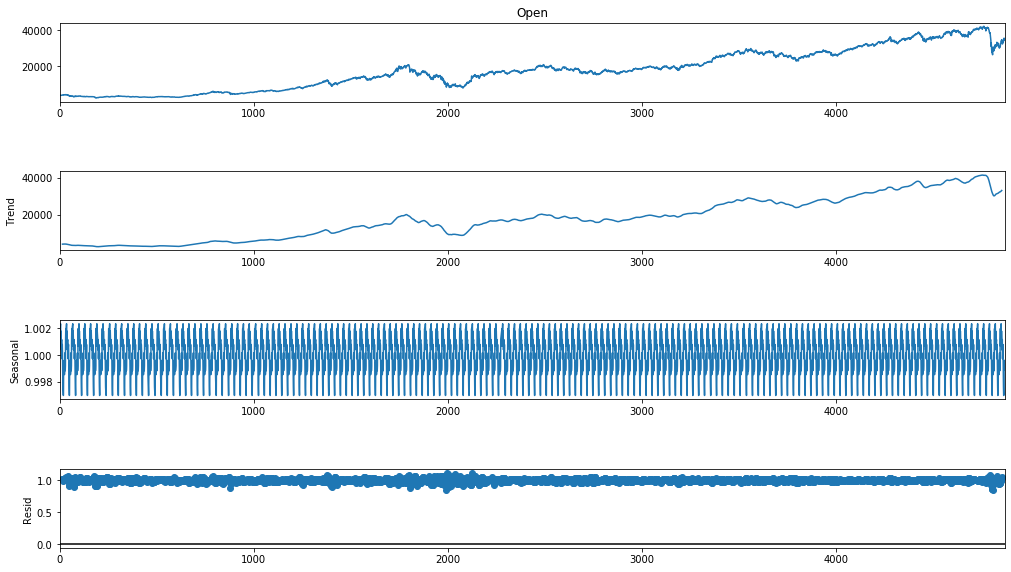

In [48]:
sea_dec = seasonal_decompose(df['Open'], model='multiplicative', freq = 30)
fig = plt.figure()  
fig = sea_dec.plot()  
fig.set_size_inches(16, 9)
plt.show()

In [51]:
df.shape

(4794, 7)

### split data into **train and test**

In [52]:
train = df[df['Date'] > '2013-04-30']
test = df[df['Date'] < '2013-04-30']

In [53]:
test.shape, train.shape

((3042, 7), (1751, 7))

### For opening price
-  autoARIMA **(AutoRegressive Integrated Moving Average)** for Time Series Prediction
- we can use closeing price also

In [54]:
test_data = test['Open']
train_data = train['Open']

In [55]:
test_data.shape, train_data.shape

((3042,), (1751,))

- Let's see train and test data by plot

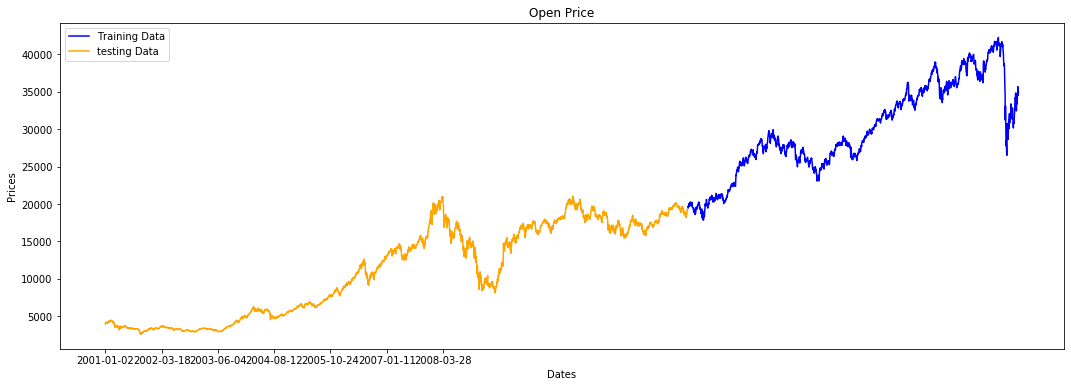

In [56]:
plt.figure(figsize=(18,6))
plt.title('Open Price')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(train_data, 'blue', label='Training Data')
plt.plot(test_data, 'orange', label='testing Data')
plt.xticks(np.arange(0,1857, 300), df['Date'][0:1857:300])
plt.legend()
plt.show()

### **Auto ARIMA** (AutoRegressive Integrated Moving Average):
- **Automatically discover the optimal order** for an ARIMA model. The auto_arima function seeks to **identify the most optimal parameters for an ARIMA model**, and returns a **fitted ARIMA model**.

In [77]:
from pmdarima.arima import auto_arima

In [78]:
autoARIMA_model = auto_arima(train_data, start_p=0, start_q=0, test='adf', max_p=3, max_q=3, m=1 , seasonal=False, 
                             start_P=0, D=0, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)
print(autoARIMA_model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10109.158, Time=0.55 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10111.162, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10111.226, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10107.812, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10112.710, Time=0.52 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.661 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  800
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -5052.906
Date:                Fri, 09 Oct 2020   AIC                          10107.812
Time:                        14:56:50   BIC                          10112.496
Sample:                             0   HQIC                         10109.611
                                - 800                                  

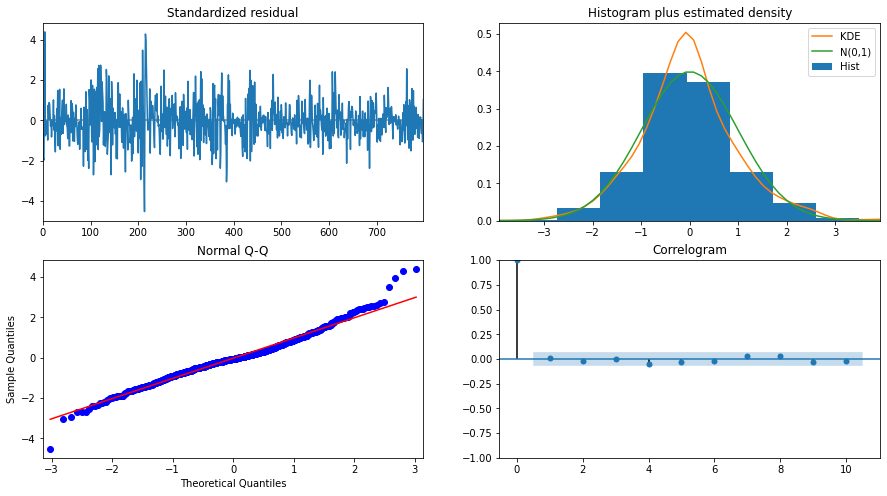

In [79]:
autoARIMA_model.plot_diagnostics(figsize=(15,8))
plt.show()

### Fitting model

In [81]:
autoARIMA_model.fit(train_data)

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

### Forcasting

In [82]:
forecast = autoARIMA_model.predict(n_periods=1188)

In [83]:
forecast_data = pd.DataFrame(forecast,index = test_data.index,columns=['Prediction'])

#### Let us also check the commonly used **accuracy metrics to judge forecast results**:

In [84]:
# report performance

mse = mean_squared_error(test_data, forecast)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data, forecast)

print('Mean Squared Error      : ',mse)
print('Root Mean_Squared_Error : ',rmse)
print('Mean Absolute Error     : ',mae)


Mean Squared Error      :  16477045.50559826
Root Mean_Squared_Error :  4059.1927159964034
Mean Absolute Error     :  3638.5044885505054


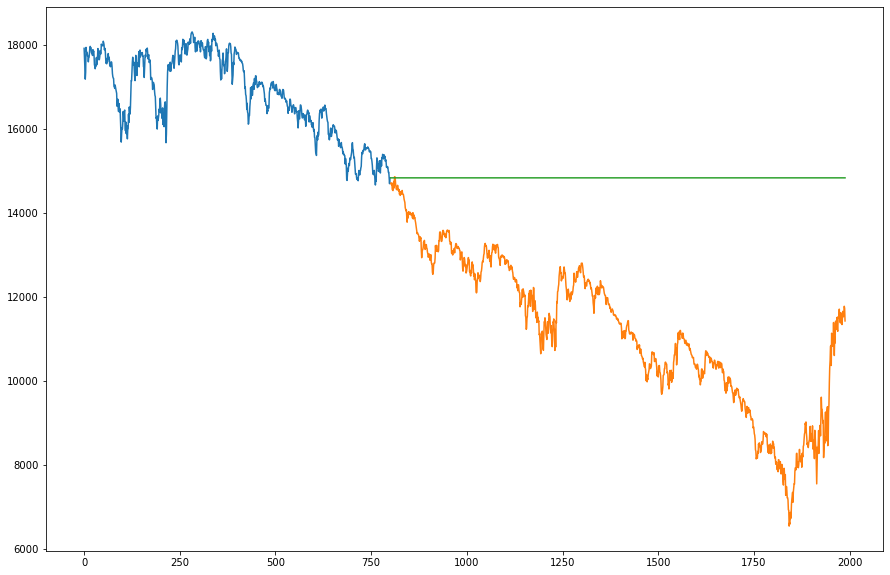

In [85]:
#visualizing
plt.figure(figsize=(15,10))

plt.plot(train_data)
plt.plot(test_data)
plt.plot(forecast_data['Prediction'])
plt.show()

# **Create a hybrid Model**
- for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines

##  **But before that let's do some NLP on this headlines dataset**

In [130]:
news_headline = pd.read_csv('Combined_News_DJIA.csv', encoding='ISO-8859-1')
news_headline.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

- since this **headline data collected on the basis of time series** so we can not take random data for splitting, that's why we **cansider a date** and take **train data less than date** and **test data greater than that date**

In [131]:
train = news_headline[news_headline['Date'] < '20150101']
test =news_headline[news_headline['Date'] > '20141231']

In [88]:
train.shape, test.shape

((1863, 27), (378, 27))

- drop unwanted column

In [132]:
train.drop(columns=['Date'],inplace=True,axis=1)
test.drop(columns=['Date'],inplace=True,axis=1)

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


- separate dependent and independent data from **train data** as `x_train` and `y_train` and similarly for **test data**

In [133]:
x_train = train.drop(columns=['Label'])
y_train = train['Label']
x_test = test.drop(columns=['Label'])
y_test = test['Label']

### **train and test data preprocessing**

- remove all the **special char or numbers** except the words that contain a-zA-Z this letters from train and test data

In [134]:
x_train.replace('[^a-zA-Z]',' ',regex = True, inplace=True)
x_test.replace('[^a-zA-Z]',' ',regex = True, inplace=True)

In [135]:
col_list = list(x_train.columns)

- **converting all independent features values to lower case for train and test data**

In [136]:
for col in col_list:
    x_train[col] = x_train[col].str.lower()
    x_test[col] = x_test[col].str.lower()


- **join the headline by rows into sentence** for `train data`

In [137]:
headlines_train = []
for row in range(0, len(x_train.index)):
    lines = ' '.join(str(k) for k in x_train.iloc[row])
    headlines_train.append(lines)

- **join the headline by rows into sentence** for `test data`

In [138]:
headlines_test = []
for row in range(0, len(x_test.index)):
    lines = ' '.join(str(k) for k in x_test.iloc[row])
    headlines_test.append(lines)

### **TF-IDF Vectorizer**

In [139]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [140]:
tfidf = TfidfVectorizer(ngram_range=(2,2))

In [141]:
x_new_train  = tfidf.fit_transform(headlines_train)     # for train fit_transform
x_new_test  = tfidf.transform(headlines_test)           # for test transform

In [142]:
x_new_train.shape, x_new_test.shape

((1863, 403977), (378, 403977))

### **Random Forest**

In [143]:
from sklearn.ensemble import RandomForestClassifier

In [144]:
rfc = RandomForestClassifier(n_estimators=200,criterion='entropy')

In [145]:
rfc.fit(x_new_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [146]:
y_train_pred = rfc.predict(x_new_train)
y_test_pred = rfc.predict(x_new_test)

In [147]:
from sklearn.metrics import accuracy_score , confusion_matrix

In [148]:
print("Accuracy for train data : ",accuracy_score(y_train,y_train_pred))
print("Accuracy for test data  : ",accuracy_score(y_test,y_test_pred))

Accuracy for train data :  1.0
Accuracy for test data  :  0.8386243386243386


# **Lets see Hybrid model**

- Hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines

In [113]:
import re

In [105]:
news_data = pd.read_csv('Combined_News_DJIA.csv', encoding='ISO-8859-1')
news_data.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

### Data Preprocessing

In [106]:
news_data.iloc[:,2:].replace('[^a-zA-Z]',' ',regex = True, inplace=True)

In [107]:
col_list = list(news_data.iloc[:,2:].columns)

In [108]:
for col in col_list:
    news_data[col] = news_data[col].str.lower()


In [111]:
# join the headline by rows into sentence for data
headlines_text = []
for row in range(0, len(news_data.index)):
    lines = ' '.join(str(k) for k in news_data.iloc[row,2:])
    headlines_text.append(lines)

- remove bracket, Operators etc. from text data

In [114]:
final_headlines_text = []
for i in range(len(headlines_text)):
    final_headlines_text.append(re.sub("b[(')]+", '', headlines_text[i] ))
    final_headlines_text[i] = re.sub('b[(")]+', '', final_headlines_text[i] )
    final_headlines_text[i] = re.sub("\'", '', final_headlines_text[i] )

In [117]:
news_data['Headline_News'] = final_headlines_text

In [118]:
news_data.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,Headline_News
0,2008-08-08,0,"b""georgia 'downs two russian warplanes' as cou...",b'breaking: musharraf to be impeached.',b'russia today: columns of troops roll into so...,b'russian tanks are moving towards the capital...,"b""afghan children raped with 'impunity,' u.n. ...",b'150 russian tanks have entered south ossetia...,"b""breaking: georgia invades south ossetia, rus...","b""the 'enemy combatent' trials are nothing but...",...,b'al-qaeda faces islamist backlash',"b'condoleezza rice: ""the us would not act to p...",b'this is a busy day: the european union has ...,"b""georgia will withdraw 1,000 soldiers from ir...",b'why the pentagon thinks attacking iran is a ...,b'caucasus in crisis: georgia invades south os...,b'indian shoe manufactory - and again in a se...,b'visitors suffering from mental illnesses ban...,"b""no help for mexico's kidnapping surge""",georgia downs two russian warplanes as countri...
1,2008-08-11,1,b'why wont america and nato help us? if they w...,b'bush puts foot down on georgian conflict',"b""jewish georgian minister: thanks to israeli ...",b'georgian army flees in disarray as russians ...,"b""olympic opening ceremony fireworks 'faked'""",b'what were the mossad with fraudulent new zea...,b'russia angered by israeli military sale to g...,b'an american citizen living in s.ossetia blam...,...,"b'""do not believe tv, neither russian nor geor...",b'riots are still going on in montreal (canada...,b'china to overtake us as largest manufacturer',b'war in south ossetia [pics]',b'israeli physicians group condemns state tort...,b' russia has just beaten the united states ov...,b'perhaps *the* question about the georgia - r...,b'russia is so much better at war',"b""so this is what it's come to: trading sex fo...",why wont america and nato help us? if they won...
2,2008-08-12,0,b'remember that adorable 9-year-old who sang a...,"b""russia 'ends georgia operation'""","b'""if we had no sexual harassment we would hav...","b""al-qa'eda is losing support in iraq because ...",b'ceasefire in georgia: putin outmaneuvers the...,b'why microsoft and intel tried to kill the xo...,b'stratfor: the russo-georgian war and the bal...,"b""i'm trying to get a sense of this whole geor...",...,b'why russias response to georgia was right',"b'gorbachev accuses u.s. of making a ""serious ...","b'russia, georgia, and nato: cold war two'",b'remember that adorable 62-year-old who led y...,b'war in georgia: the israeli connection',b'all signs point to the us encouraging georgi...,b'christopher king argues that the us and nato...,b'america: the new mexico?',"b""bbc news | asia-pacific | extinction 'by man...",remember that adorable 9-year-old who sang at ...
3,2008-08-13,0,b' u.s. refuses israel weapons to attack iran:...,"b""when the president ordered to attack tskhinv...",b' israel clears troops who killed reuters cam...,b'britain\'s policy of being tough on drugs is...,b'body of 14 year old found in trunk; latest (...,b'china has moved 10 *million* quake survivors...,"b""bush announces operation get all up in russi...",b'russian forces sink georgian ships ',...,b'us humanitarian missions soon in georgia - i...,"b""georgia's ddos came from us sources""","b'russian convoy heads into georgia, violating...",b'israeli defence minister: us against strike ...,b'gorbachev: we had no choice',b'witness: russian forces head towards tbilisi...,b' quarter of russians blame u.s. for conflict...,b'georgian president says us military will ta...,b'2006: nobel laureate aleksander solzhenitsyn...,u.s. refuses israel weapons to attack iran: r...
4,2008-08-14,1,b'all the experts admit that we should legalis...,b'war in south osetia - 89 pictures made by a ...,b'swedish wrestler ara abrahamian throws away ...,b'russia exaggerated the death toll in south o...,b'missile that killed 9 inside pakistan may ha...,"b""rushdie condemns random house's refusal to p

- **Removing column Top1 to Top 25 because we already created a column that contain combine text data from Top 1- Top 25 column**

In [123]:
unwanted_col = news_data.iloc[:,2:27].columns

In [124]:
unwanted_col

Index(['Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7', 'Top8', 'Top9',
       'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15', 'Top16', 'Top17',
       'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23', 'Top24', 'Top25'],
      dtype='object')

In [125]:
news_data.drop(columns=unwanted_col, inplace=True)

In [126]:
news_data.head()

,Date,Label,Headline_News
0,2008-08-08,0,georgia downs two russian warplanes as countri...
1,2008-08-11,1,why wont america and nato help us? if they won...
2,2008-08-12,0,remember that adorable 9-year-old who sang at ...
3,2008-08-13,0,u.s. refuses israel weapons to attack iran: r...
4,2008-08-14,1,all the experts admit that we should legalise ...


## Merging news_data and Stock_price data on 'Date'


In [149]:
stock_price = df.copy()

In [150]:
stock_price.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


- Merge `stock_price` and `News_data dataset` on the basis of **Date column**

In [151]:
hybrid_data = news_data.merge(stock_price, how='inner', on='Date', left_index = True)

hybrid_data.head()

,Date,Label,Headline_News,Open,High,Low,Close,Volume,Adj Close
1988,2008-08-08,0,georgia downs two russian warplanes as countri...,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
1987,2008-08-11,1,why wont america and nato help us? if they won...,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
1986,2008-08-12,0,remember that adorable 9-year-old who sang at ...,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
1985,2008-08-13,0,u.s. refuses israel weapons to attack iran: r...,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
1984,2008-08-14,1,all the experts admit that we should legalise ...,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688


### **Sentiment Analysis**
#### TextBlob

In [152]:
def analysis_polarity(headline):
    result = TextBlob(headline)
    
    if result.sentiment.polarity < 0:
        return 'negative'
    elif result.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'positive'

In [153]:
hybrid_data['sentiment'] = np.array([analysis_polarity(headline) for headline in hybrid_data['Headline_News']])

In [154]:
hybrid_data.head()

,Date,Label,Headline_News,Open,High,Low,Close,Volume,Adj Close,sentiment
1988,2008-08-08,0,georgia downs two russian warplanes as countri...,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,negative
1987,2008-08-11,1,why wont america and nato help us? if they won...,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,positive
1986,2008-08-12,0,remember that adorable 9-year-old who sang at ...,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,negative
1985,2008-08-13,0,u.s. refuses israel weapons to attack iran: r...,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961,positive
1984,2008-08-14,1,all the experts admit that we should legalise ...,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,positive


In [155]:
senti_data = pd.get_dummies(hybrid_data['sentiment'],drop_first=True)

In [156]:
hybrid_data = pd.concat([hybrid_data,senti_data],axis=1)

- Column `positive` says which statement is positive or not **{1 : positive headline, 0 : negative headline}**

In [157]:
hybrid_data.head()

,Date,Label,Headline_News,Open,High,Low,Close,Volume,Adj Close,sentiment,positive
1988,2008-08-08,0,georgia downs two russian warplanes as countri...,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,negative,0
1987,2008-08-11,1,why wont america and nato help us? if they won...,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,positive,1
1986,2008-08-12,0,remember that adorable 9-year-old who sang at ...,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,negative,0
1985,2008-08-13,0,u.s. refuses israel weapons to attack iran: r...,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961,positive,1
1984,2008-08-14,1,all the experts admit that we should legalise ...,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,positive,1


### VADERSentiment Analysis

In [158]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [159]:
#Create function to get the sentiment scores (using Sentiment Intensity Analyzer)
def get_senti_analysis(text):
    senti_an = SentimentIntensityAnalyzer()
    sentiment = senti_an.polarity_scores(text)
    return sentiment

In [160]:
# Get the sentiment scores for each day
compound = []
negative = []
neutral = []
positive = []
sia = 0
for i in range(len(hybrid_data['Headline_News'])):
    sia = get_senti_analysis(hybrid_data['Headline_News'][i])
    compound.append(sia['compound'])
    negative.append(sia['neg'])
    neutral.append(sia['neu'])
    positive.append(sia['pos'])

- Create a separate columns for `Compound`, `Negative`, `Neutral` and `Positive` Scores

In [161]:
hybrid_data['Compound'] = compound
hybrid_data['Negative'] = negative
hybrid_data['Neutral']  = neutral
hybrid_data['Positive'] = positive

In [162]:
hybrid_data.head()

,Date,Label,Headline_News,Open,High,Low,Close,Volume,Adj Close,sentiment,positive,Compound,Negative,Neutral,Positive
1988,2008-08-08,0,georgia downs two russian warplanes as countri...,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,negative,0,-0.9983,0.212,0.729,0.059
1987,2008-08-11,1,why wont america and nato help us? if they won...,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,positive,1,-0.9977,0.202,0.738,0.061
1986,2008-08-12,0,remember that adorable 9-year-old who sang at ...,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,negative,0,-0.9975,0.225,0.684,0.091
1985,2008-08-13,0,u.s. refuses israel weapons to attack iran: r...,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961,positive,1,-0.9571,0.132,0.767,0.102
1984,2008-08-14,1,all the experts admit that we should legalise ...,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,positive,1,-0.9644,0.148,0.758,0.094


In [383]:
hybrid_data.columns

Index(['Date', 'Label', 'Headline_News', 'Open', 'High', 'Low', 'Close',
       'Volume', 'Adj Close', 'sentiment', 'positive', 'Compound', 'Negative',
       'Neutral', 'Positive'],
      dtype='object')

- **Create a list of columns which we need to keep for model creation**

In [163]:
need_col = [ 'Open',  'High', 'Low','Volume','Compound', 'Negative', 'Neutral' ,'Positive','Label']

In [164]:
new_hybrid = hybrid_data[need_col]
new_hybrid.reset_index(inplace = True)

In [165]:
new_hybrid.drop(columns=['index'],inplace=True)

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


- **Final Hybrid Dataset**

In [166]:
new_hybrid.head()

,Open,High,Low,Volume,Compound,Negative,Neutral,Positive,Label
0,11432.089844,11759.959961,11388.040039,212830000,-0.9983,0.212,0.729,0.059,0
1,11729.669922,11867.110352,11675.530273,183190000,-0.9977,0.202,0.738,0.061,1
2,11781.700195,11782.349609,11601.519531,173590000,-0.9975,0.225,0.684,0.091,0
3,11632.809570,11633.780273,11453.339844,182550000,-0.9571,0.132,0.767,0.102,0
4,11532.070312,11718.280273,11450.889648,159790000,-0.9644,0.148,0.758,0.094,1


#### **Separate Dependent and Independent varaibles**

In [168]:
X = new_hybrid.drop('Label', axis=1)    # independent variables

y = new_hybrid['Label']                # dependent variable

#### **Split data into train and test**

In [169]:
from sklearn.model_selection import train_test_split

In [170]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

### 1. **Logistic Regression**

In [171]:
from sklearn.linear_model import LogisticRegression

In [176]:
logit = LogisticRegression()

logit.fit(x_train,y_train)
y_logit_pred = logit.predict(x_test)
accuracy_score(y_test,y_logit_pred)

0.5100502512562815

## 2. **Random forest**

In [177]:
rf = RandomForestClassifier(n_estimators=200)
rf.fit(x_train,y_train)
y_rf_pred = rf.predict(x_test)
accuracy_score(y_test,y_rf_pred)

0.5904522613065326

## 3. **SVC (Support Vector Classifier)**

In [179]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
y_svc_pred = svc.predict(x_test)
accuracy_score(y_test,y_svc_pred)

0.5175879396984925

## 4. **Linear Discriminant Analysis**.

In [180]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)
y_lda_pred = lda.predict(x_test)
accuracy_score(y_test,y_lda_pred)

0.8366834170854272

#### Model Accuracy

In [182]:
print("Logistic Regression Model Accuracy :- ",accuracy_score(y_test,y_logit_pred))
print("Random forest Model Accuracy       :- ",accuracy_score(y_test,y_rf_pred))
print("Decision Tree Model Accuracy       :- ",accuracy_score(y_test,y_dt_pred))
print("SVC Model Accuracy                 :- ",accuracy_score(y_test,y_svc_pred))
print("Linear Discriminant Model Accuracy :- ",accuracy_score(y_test,y_lda_pred))

Logistic Regression Model Accuracy :-  0.5100502512562815
Random forest Model Accuracy       :-  0.5904522613065326
Decision Tree Model Accuracy       :-  0.5954773869346733
SVC Model Accuracy                 :-  0.5175879396984925
Linear Discriminant Model Accuracy :-  0.8366834170854272
